In [ ]:
!pip install -r https://raw.githubusercontent.com/datamllab/automl-in-action-notebooks/master/requirements.txt

In [2]:
import tensorflow as tf
import autokeras as ak

### Tuning MLP for structured-data regression  (Normalization + DenseBlock)

In [3]:
input_node = ak.StructuredDataInput()
output_node = ak.Normalization()(input_node)
output_node = ak.DenseBlock(use_batchnorm=False, dropout=0.0)(output_node)
output_node = ak.RegressionHead(dropout=0.0)(output_node)
auto_model = ak.AutoModel(inputs=input_node, outputs=output_node, max_trials=10, overwrite=True, seed=42)

In [4]:
from sklearn.datasets import fetch_california_housing

house_dataset = fetch_california_housing()

# Import pandas package to format the data
import pandas as pd

# Extract features with their names into the a dataframe format
data = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names)

# Extract target with their names into a pd.Series object with name MEDV
target = pd.Series(house_dataset.target, name = 'MEDV')

from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, target, test_size=0.2, random_state=42)

auto_model.fit(train_data, train_targets, batch_size=1024, epochs=150)

Trial 10 Complete [00h 01m 11s]
val_loss: 0.28206396102905273

Best val_loss So Far: 0.2762356400489807
Total elapsed time: 00h 10m 42s
INFO:tensorflow:Oracle triggered exit
Epoch 1/150
17/17 [==============================] - 1s 17ms/step - loss: 3.0040 - mean_squared_error: 3.0040
Epoch 2/150
17/17 [==============================] - 0s 17ms/step - loss: 1.0038 - mean_squared_error: 1.0038
Epoch 3/150
17/17 [==============================] - 0s 19ms/step - loss: 0.7592 - mean_squared_error: 0.7592
Epoch 4/150
17/17 [==============================] - 0s 17ms/step - loss: 0.6324 - mean_squared_error: 0.6324
Epoch 5/150
17/17 [==============================] - 0s 17ms/step - loss: 0.5378 - mean_squared_error: 0.5378
Epoch 6/150
17/17 [==============================] - 0s 16ms/step - loss: 0.4659 - mean_squared_error: 0.4659
Epoch 7/150
17/17 [==============================] - 0s 21ms/step - loss: 0.4222 - mean_squared_error: 0.4222
Epoch 8/150
17/17 [==============================] - 0s 

### Visualize the best pipeline

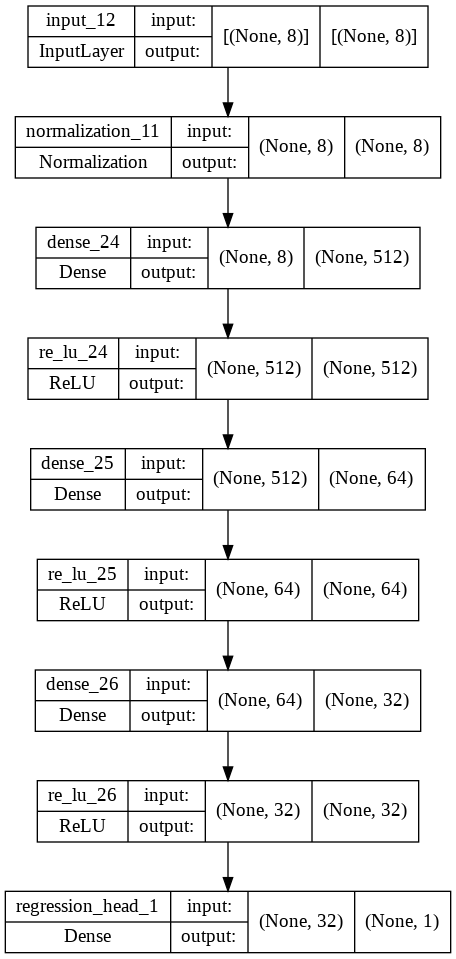

In [5]:
best_model = auto_model.export_model()
tf.keras.utils.plot_model(best_model, show_shapes=True, expand_nested=True) # rankdir='LR'

### Evaluate best pipeline

In [6]:
test_loss, test_acc = auto_model.evaluate(test_data, test_targets, verbose=0)
print('Test accuracy: ', test_acc)

Test accuracy:  0.27090755105018616


### Show best trial

Results summary
Results in ./auto_model
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
dense_block_1/num_layers: 3
dense_block_1/units_0: 512
dense_block_1/units_1: 64
optimizer: adam
learning_rate: 0.001
dense_block_1/units_2: 32
Score: 0.2762356400489807


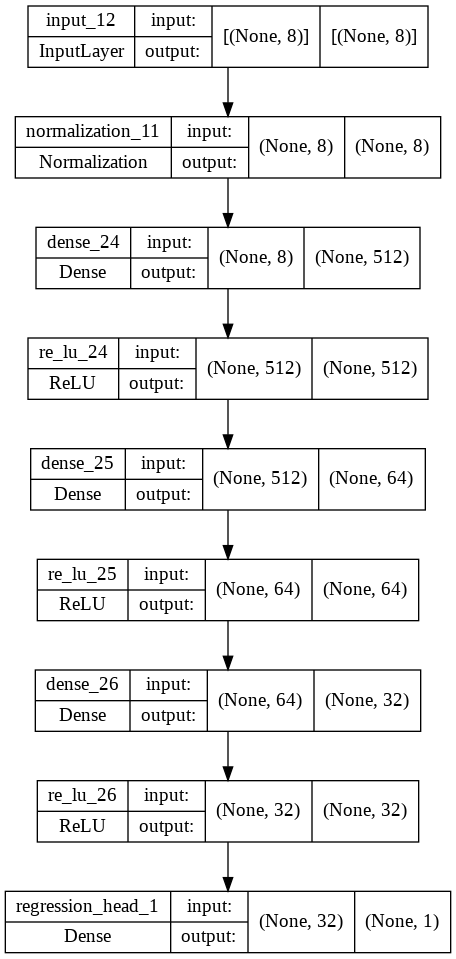

In [7]:
auto_model.tuner.results_summary(num_trials=1)
best_model = auto_model.export_model()
tf.keras.utils.plot_model(best_model, show_shapes=True, expand_nested=True)

In [8]:
from tensorflow import keras
best_model.save('saved_model')
best_model = keras.models.load_model('saved_model')

INFO:tensorflow:Assets written to: saved_model/assets


### Customize the search space for tuning MLP

In [9]:
from kerastuner.engine import hyperparameters as hp

input_node = ak.StructuredDataInput()
output_node = ak.Normalization()(input_node)
output_node = ak.DenseBlock(num_layers=1, 
                            num_units=hp.Choice("num_units", [128, 256, 512, 1024]),
                            use_batchnorm=False, 
                            dropout=0.0)(output_node)
output_node = ak.DenseBlock(num_layers=1, 
                            num_units=hp.Choice("num_units", [16, 32, 64]),
                            use_batchnorm=False, 
                            dropout=0.0)(output_node)
output_node = ak.RegressionHead()(output_node)
auto_model = ak.AutoModel(inputs=input_node, outputs=output_node, max_trials=10, overwrite=True, seed=42)

auto_model.fit(train_data, train_targets, batch_size=1024, epochs=150)


Trial 10 Complete [00h 01m 11s]
val_loss: 0.9883980751037598

Best val_loss So Far: 0.2872953712940216
Total elapsed time: 00h 09m 16s
INFO:tensorflow:Oracle triggered exit
Epoch 1/150
17/17 [==============================] - 1s 11ms/step - loss: 3.3178 - mean_squared_error: 3.3178
Epoch 2/150
17/17 [==============================] - 0s 11ms/step - loss: 1.1573 - mean_squared_error: 1.1573
Epoch 3/150
17/17 [==============================] - 0s 13ms/step - loss: 0.8219 - mean_squared_error: 0.8219
Epoch 4/150
17/17 [==============================] - 0s 13ms/step - loss: 0.7146 - mean_squared_error: 0.7146
Epoch 5/150
17/17 [==============================] - 0s 15ms/step - loss: 0.6382 - mean_squared_error: 0.6382
Epoch 6/150
17/17 [==============================] - 0s 14ms/step - loss: 0.5757 - mean_squared_error: 0.5757
Epoch 7/150
17/17 [==============================] - 0s 15ms/step - loss: 0.5263 - mean_squared_error: 0.5263
Epoch 8/150
17/17 [==============================] - 0s 1

### Display the best pipeline

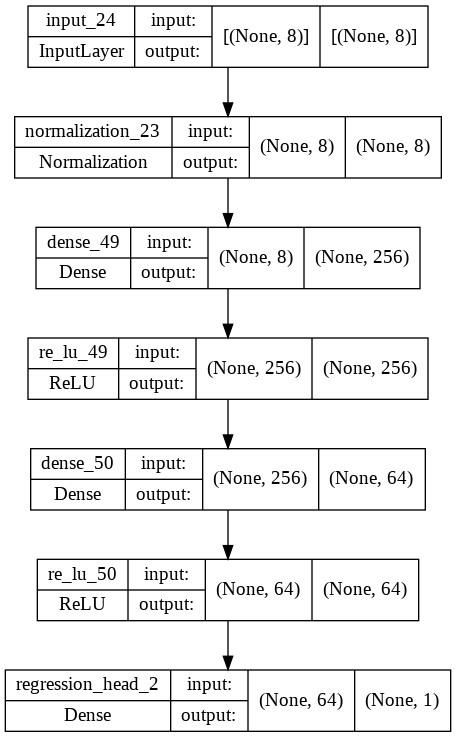

In [10]:
best_model = auto_model.export_model()
tf.keras.utils.plot_model(best_model, show_shapes=True, expand_nested=True) # rankdir='LR'

In [11]:
test_loss, test_acc = auto_model.evaluate(test_data, test_targets, verbose=0)
print('Test accuracy: ', test_acc)

Test accuracy:  0.27266761660575867


In [12]:
auto_model.tuner.results_summary(num_trials=1)

Results summary
Results in ./auto_model
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
dense_block_2/units_0: 256
dense_block_3/units_0: 64
regression_head_2/dropout: 0.0
optimizer: adam
learning_rate: 0.001
Score: 0.2872953712940216


In [13]:
best_model.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 8)]               0         
                                                                 
 normalization_23 (Normaliza  (None, 8)                17        
 tion)                                                           
                                                                 
 dense_49 (Dense)            (None, 256)               2304      
                                                                 
 re_lu_49 (ReLU)             (None, 256)               0         
                                                                 
 dense_50 (Dense)            (None, 64)                16448     
                                                                 
 re_lu_50 (ReLU)             (None, 64)                0         
                                                          